In [1]:
import configparser
import boto3 
import pandas as pd 
import s3fs

# Load AWS Credentials
config = configparser.ConfigParser()
config.read('aws.cfg')

aws_access_key = config['AWS']['aws_access_key_id']
aws_secret_key = config['AWS']['aws_secret_access_key']

In [3]:
comprehend_client = boto3.client('comprehend', aws_access_key_id=aws_access_key, aws_secret_access_key=aws_secret_key,region_name='us-west-2')


In [4]:
products_df = pd.read_csv('s3://techcatalyst-public/resources/sentiment/product.csv')
products_df

,PRODUCT ID,PRODUCT DESCRIPTION,REVIEW ID
0,1,High-quality smartphone with excellent camera.,R1
1,1,High-quality smartphone with excellent camera.,R2
2,2,Durable laptop with long battery life.,R3
3,2,Durable laptop with long battery life.,R4
4,3,Wireless noise-canceling headphones.,R5
5,3,Wireless noise-canceling headphones.,R6
6,4,Smartwatch with various health tracking features.,R7
7,4,Smartwatch with various health tracking features.,R8
8,5,Portable Bluetooth speaker with rich sound.,R9
9,5,Portable Bluetooth speaker with rich sound.,R10


In [5]:
review_df = pd.read_csv('s3://techcatalyst-public/resources/sentiment/review.csv')
review_df

,REVIEW ID,REVIEW TEXT
0,R1,"Great camera quality, but battery life could b..."
1,R2,Very satisfied with this smartphone. Worth eve...
2,R3,Excellent performance and battery life. Highly...
3,R4,Disappointed with the build quality. Feels cheap.
4,R5,Fantastic noise cancellation and sound quality.
5,R6,Not comfortable to wear for long periods.
6,R7,Great health tracking features but too expensive.
7,R8,Love the design and functionality. Would buy a...
8,R9,Sound quality is amazing for its size.
9,R10,Battery life is too short for outdoor use.


In [6]:
combined_df = products_df.merge(review_df, on="REVIEW ID")
combined_df

,PRODUCT ID,PRODUCT DESCRIPTION,REVIEW ID,REVIEW TEXT
0,1,High-quality smartphone with excellent camera.,R1,"Great camera quality, but battery life could b..."
1,1,High-quality smartphone with excellent camera.,R2,Very satisfied with this smartphone. Worth eve...
2,2,Durable laptop with long battery life.,R3,Excellent performance and battery life. Highly...
3,2,Durable laptop with long battery life.,R4,Disappointed with the build quality. Feels cheap.
4,3,Wireless noise-canceling headphones.,R5,Fantastic noise cancellation and sound quality.
5,3,Wireless noise-canceling headphones.,R6,Not comfortable to wear for long periods.
6,4,Smartwatch with various health tracking features.,R7,Great health tracking features but too expensive.
7,4,Smartwatch with various health tracking features.,R8,Love the design and functionality. Would buy a...
8,5,Portable Bluetooth speaker with rich sound.,R9,Sound quality is amazing for its size.
9,5,Portable Bluetooth speaker with rich sound.,R10,Battery life is too short for outdoor use.


In [9]:
def add_sentiment(text_line):
    sentiment = comprehend_client.detect_sentiment(
    Text=text_line,
    LanguageCode='en'
    )['Sentiment']
    return sentiment

combined_df['Sentiment'] = combined_df["REVIEW TEXT"].apply(add_sentiment)

# my_dict = comprehend_client.detect_sentiment(Text="Hello, you are such a good teacher, I love your teaching style", LanguageCode='en')
# print(my_dict['Sentiment'])

In [10]:
combined_df 

,PRODUCT ID,PRODUCT DESCRIPTION,REVIEW ID,REVIEW TEXT,Sentiment
0,1,High-quality smartphone with excellent camera.,R1,"Great camera quality, but battery life could b...",MIXED
1,1,High-quality smartphone with excellent camera.,R2,Very satisfied with this smartphone. Worth eve...,POSITIVE
2,2,Durable laptop with long battery life.,R3,Excellent performance and battery life. Highly...,POSITIVE
3,2,Durable laptop with long battery life.,R4,Disappointed with the build quality. Feels cheap.,NEGATIVE
4,3,Wireless noise-canceling headphones.,R5,Fantastic noise cancellation and sound quality.,POSITIVE
5,3,Wireless noise-canceling headphones.,R6,Not comfortable to wear for long periods.,NEGATIVE
6,4,Smartwatch with various health tracking features.,R7,Great health tracking features but too expensive.,MIXED
7,4,Smartwatch with various health tracking features.,R8,Love the design and functionality. Would buy a...,POSITIVE
8,5,Portable Bluetooth speaker with rich sound.,R9,Sound quality is amazing for its size.,POSITIVE
9,5,Portable Bluetooth speaker with rich sound.,R10,Battery life is too short for outdoor use.,NEGATIVE


In [53]:
results = combined_df['Sentiment'].value_counts()
results

Sentiment
POSITIVE    10
NEGATIVE     8
MIXED        2
Name: count, dtype: int64

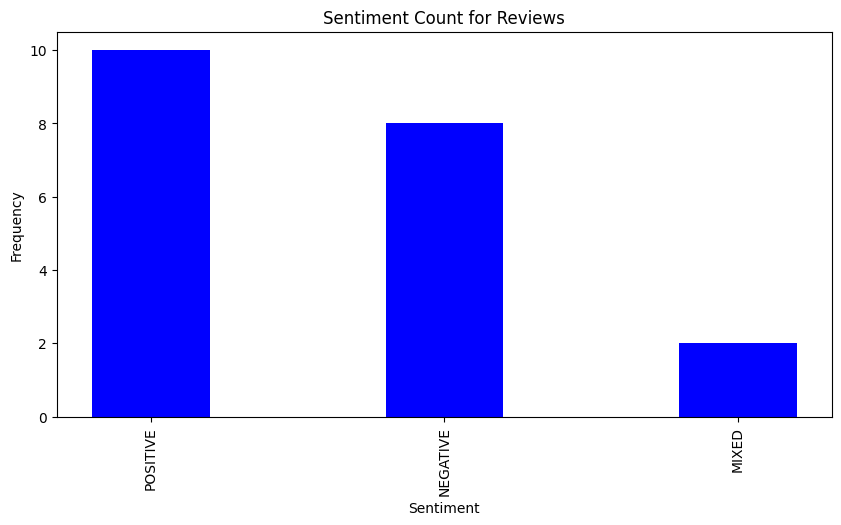

<Figure size 640x480 with 0 Axes>

In [55]:
import numpy as np
import matplotlib.pyplot as plt
data = {'POSITIVE' : 10, 'NEGATIVE' : 8, 'MIXED' : 2}
emotions = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

plt.bar(emotions, values, color = 'blue', width = 0.4)

plt.xlabel("Sentiment")
plt.ylabel("Frequency")

plt.title("Sentiment Count for Reviews")
plt.xticks(rotation=90)
plt.show()
plt.savefig('sentiment_count_for_reviews.jpg', format='jpg')

In [57]:
filename = 'sentiment_count_for_reviews.jpg'
bucket_name = 'techcatalyst-public'
key = '/Sriya/sentiment_count_for_reviews.jpg'

s3.upload_file(filename, bucket_name, key)
print("The file has been uploaded to the s3 bucket successfully")

The file has been uploaded to the s3 bucket successfully


In [42]:
states_df = pd.read_csv("s3://techcatalyst-public/resources/license-plates/states.csv")
states_df

,0
0,Alabama
1,Alaska
2,Arizona
3,Arkansas
4,California
5,Colorado
6,Connecticut
7,Delaware
8,Florida
9,Georgia


In [43]:
s3 = boto3.client('s3', aws_access_key_id=aws_access_key, aws_secret_access_key=aws_secret_key,region_name='us-west-2')

response = s3.list_objects_v2(
    Bucket='techcatalyst-public',
    Prefix='resources/license-plates/')
license_plate_images = []
for item in response['Contents']:
    license_plate_images.append(item['Key'])
license_plate_images.pop(0)
license_plate_images.pop()
license_plate_images

['resources/license-plates/license_plate10.jpeg',
 'resources/license-plates/license_plate11.png',
 'resources/license-plates/license_plate12.jpeg',
 'resources/license-plates/license_plate13.jpeg',
 'resources/license-plates/license_plate3.png',
 'resources/license-plates/license_plate4.jpeg',
 'resources/license-plates/license_plate6.jpeg',
 'resources/license-plates/license_plate7.jpg',
 'resources/license-plates/license_plate8.png',
 'resources/license-plates/license_plate9.jpeg']

In [44]:
my_dict = {'Image':license_plate_images}
new_state_df = pd.DataFrame(my_dict)
new_state_df

,Image
0,resources/license-plates/license_plate10.jpeg
1,resources/license-plates/license_plate11.png
2,resources/license-plates/license_plate12.jpeg
3,resources/license-plates/license_plate13.jpeg
4,resources/license-plates/license_plate3.png
5,resources/license-plates/license_plate4.jpeg
6,resources/license-plates/license_plate6.jpeg
7,resources/license-plates/license_plate7.jpg
8,resources/license-plates/license_plate8.png
9,resources/license-plates/license_plate9.jpeg


In [45]:
list_of_states = states_df['0'].to_list()
list_of_states

['Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'OH',
 'Ohio',
 'OK',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'TN',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming']

In [46]:
rekognition = boto3.client('rekognition', aws_access_key_id=aws_access_key, aws_secret_access_key=aws_secret_key,region_name='us-west-2')

def add_state(img_name):
    image = {'S3Object': {'Bucket': 'techcatalyst-public', 'Name': img_name}}

    response = rekognition.detect_text(Image=image)
    for item in response['TextDetections']:
        if item['DetectedText'].title() in list_of_states:
            return item['DetectedText'].title()
            break

new_state_df['State'] = new_state_df['Image'].apply(add_state)



In [47]:

new_state_df

,Image,State
0,resources/license-plates/license_plate10.jpeg,Arizona
1,resources/license-plates/license_plate11.png,Texas
2,resources/license-plates/license_plate12.jpeg,Texas
3,resources/license-plates/license_plate13.jpeg,Alabama
4,resources/license-plates/license_plate3.png,Massachusetts
5,resources/license-plates/license_plate4.jpeg,Pennsylvania
6,resources/license-plates/license_plate6.jpeg,California
7,resources/license-plates/license_plate7.jpg,Nevada
8,resources/license-plates/license_plate8.png,Ohio
9,resources/license-plates/license_plate9.jpeg,Alabama


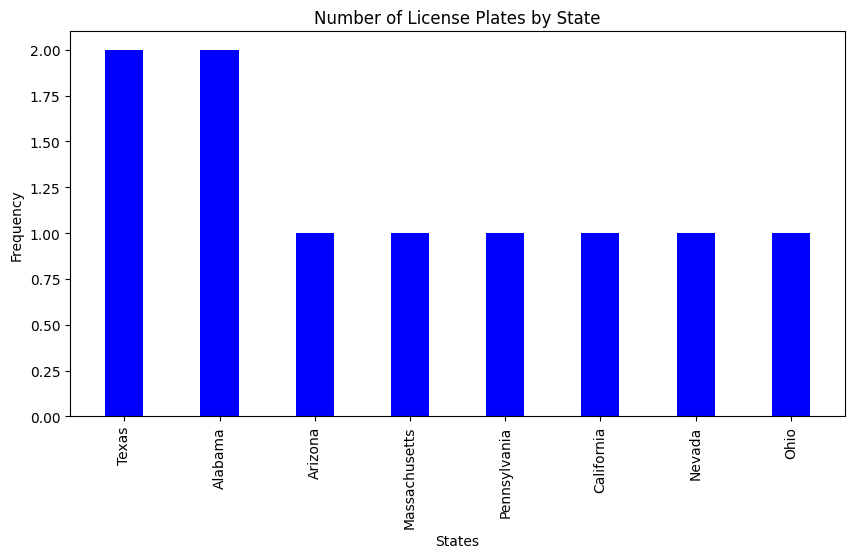

<Figure size 640x480 with 0 Axes>

In [56]:
import numpy as np
import matplotlib.pyplot as plt
data = {'Texas' : 2, 'Alabama' : 2, 'Arizona' : 1, 'Massachusetts' : 1, 'Pennsylvania' : 1, 'California' : 1, 'Nevada' : 1, 'Ohio' : 1}
states = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

plt.bar(states, values, color = 'blue', width = 0.4)

plt.xlabel("States")
plt.ylabel("Frequency")

plt.title("Number of License Plates by State")
plt.xticks(rotation=90)
plt.show()
plt.savefig('num_license_plates_by_state.jpg', format='jpg')